In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We need to calculate the purchase amount by taking into account the other features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


There are 55068 rows in our dataset

<AxesSubplot:>

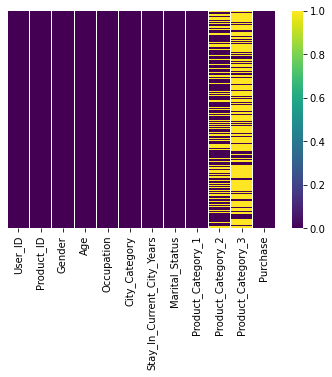

In [7]:
sns.heatmap(df.isnull(),cmap = 'viridis',yticklabels = False)

From above, we can see that Product Category 2 and 3 ahve a lot of null values. Product Category 3 can be fully dropped. 

Since we have a lot of missing values, and we don't want to drop the Product Category 2 and 3 columns, hence we can just fill the missing values with some random negative number like -2

In [8]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(value = -2.0).astype('float64')
df['Product_Category_3'] = df['Product_Category_3'].fillna(value = -2.0).astype('float64')

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

So, we can see that there are no null values in any of our columns.

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969


The gender column is categorical in nature, so we can encode it using one-hot encoding

In [11]:
# # Get one hot encoding of columns B
# # one_hot = pd.get_dummies(df['Gender'])
# # Drop column B as it is now encoded
# # df = df.drop('Gender',axis = 1)
# df.head()
# # # Join the encoded df
# df = df.join(one_hot)
# df.head()  
# print(one_hot)

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [13]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [15]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

City is a Categorical variable with 3 categories

In [16]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [17]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

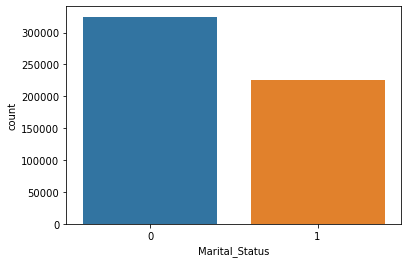

In [18]:
sns.countplot(x = 'Marital_Status',data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

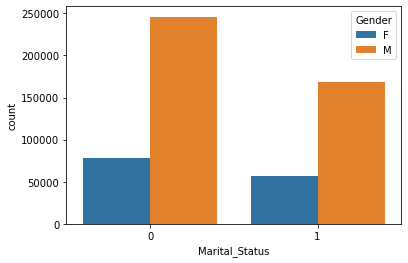

In [19]:
sns.countplot(x = 'Marital_Status',data = df,hue = 'Gender')

There are more males in every category. And in the unmarried category, there are more males and females as compared to that of the married category. This means that the males are more interested than females in black friday sales and this is more apt for unmarried people.

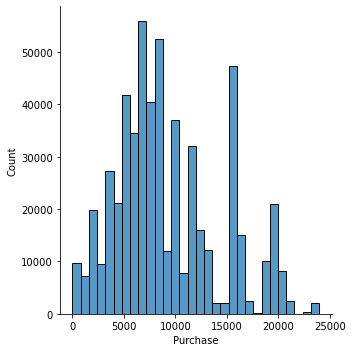

In [20]:
sns.displot(data = df, x = 'Purchase', bins = 30)

We can see that the maximum purchases are happening in the 5000-10000$ range

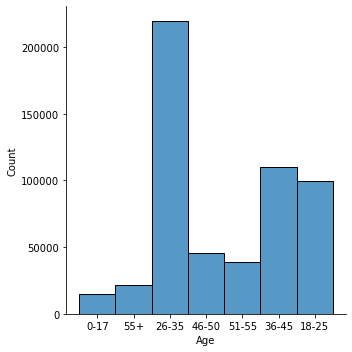

In [21]:
sns.displot(data = df, x = 'Age', bins = 30)

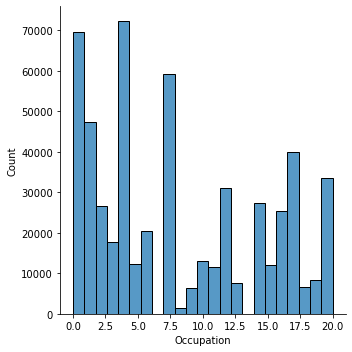

In [22]:
sns.displot(data = df, x = 'Occupation', bins = 23)

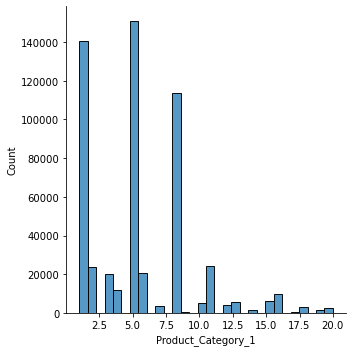

In [23]:
sns.displot(data = df, x = 'Product_Category_1', bins = 30)

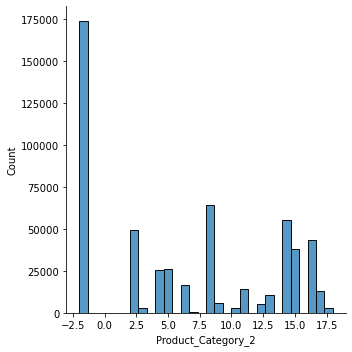

In [24]:
sns.displot(data = df, x = 'Product_Category_2', bins = 30)

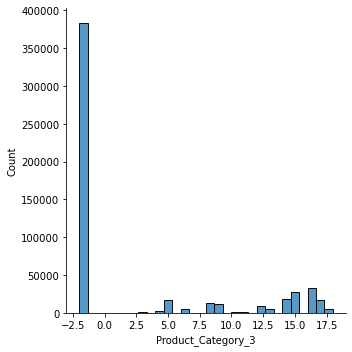

In [25]:
sns.displot(data = df, x = 'Product_Category_3', bins = 30)

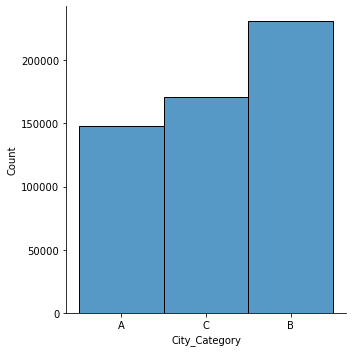

In [26]:
sns.displot(data = df, x = 'City_Category', bins = 30)

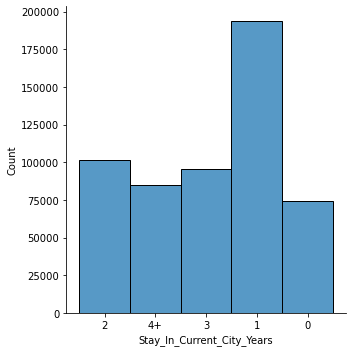

In [27]:
sns.displot(data = df, x = 'Stay_In_Current_City_Years', bins = 30)

Now, we can check what's the relation between the occupation, age and gender with the purchase amount

In [ ]:
# sns.countplot(x = 'Purchase',data = df, hue = 'Occupation')

`Pivot table in pandas is an excellent tool to summarize one or more numeric variable based on two other categorical variables.

We can use pivot table and get a new dataframe altogether. Then we can plot a bar graph to find the relationship|

In [29]:
occupation_plot = df.pivot_table(index = 'Occupation', values = 'Purchase')

In [30]:
occupation_plot.head()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251


Text(0, 0.5, 'Purchase Value')

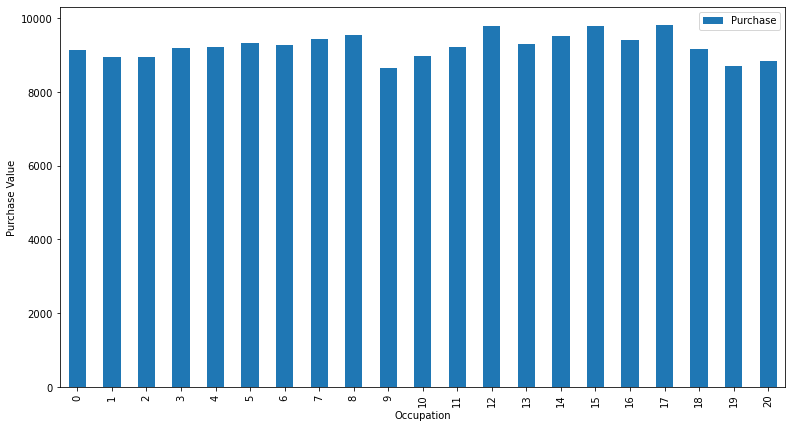

In [31]:
occupation_plot.plot(kind = 'bar',figsize = (13,7))
plt.ylabel('Purchase Value')

In [32]:
age_plot = df.pivot_table(index = 'Age', values = 'Purchase')


In [33]:
age_plot.head()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697


Text(0, 0.5, 'Purchase Value')

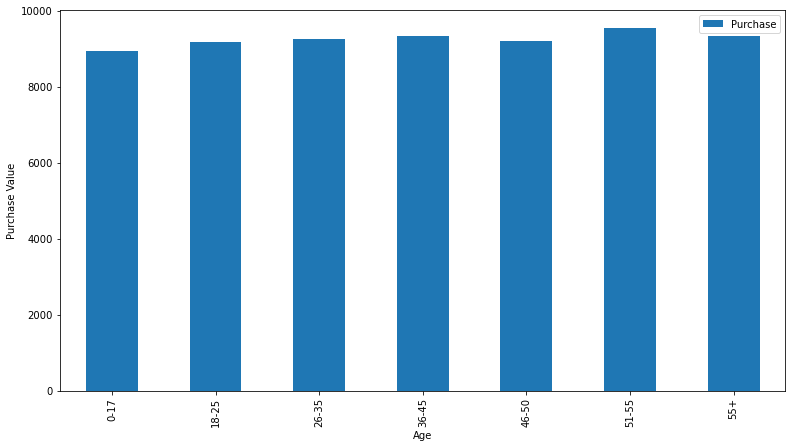

In [34]:
age_plot.plot(kind = 'bar',figsize = (13,7))
plt.ylabel('Purchase Value')

We have seen that City is a categorical variable. We can do this with a simple dictionary reassignment.

In [37]:
gender_dict = {'F' : 0, 'M' : 1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])

In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


We can use encoding from sklearn as well to encode the Age, City Category and Stay in current city years. 

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in cols:
    df[col] = le.fit_transform(df[col])
    

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969
